In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime 

%matplotlib inline 
plt.style.use("ggplot")

In [4]:
from util import get_data as get_mnist 

## Simple Synthetic Data 

In [6]:
def get_data():
    w = np.array([-0.5, 0.5])
    b = 0.1
    X = np.random.random((300,2))*2 - 1  # {300x2} value beteen [-1,+1]
    Y = np.sign(X.dot(w) + b)
    return X,Y 

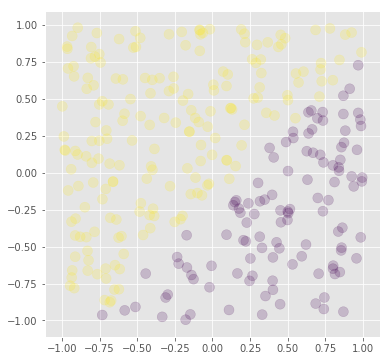

In [10]:
X,Y = get_data()
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1], c=Y, s=100, alpha=0.2)


## XOR data 

In [12]:
def get_simple_xor():
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    Y = np.array([0, 1, 1, 0])
    return X,Y  

## Perceptron class 

In [21]:
class Perceptron:
    def fit(self, X, Y, learning_rate=1.0, epocs=1000):
        D = X.shape[1]
        N = len(Y) 
        
        self.w = np.random.randn(D) # initialize with Gaussian distribution 
        self.b = 0 
        
        # keep track of costs 
        self.costs_ = [] 
        for epoch in range(epocs):
            # predict, and determine which samples are misclassified, if any 
            Yhat = self.predict(X) 
            incorrect = np.nonzero( Y != Yhat )[0] 
            if len(incorrect) == 0: 
                # all done 
                self.costs_.append(0)
                break 
            
            # choose one incorrect randomly (as an index)
            i = np.random.choice(incorrect) 
            
            # update coefficients 
            self.w += learning_rate*Y[i]*X[i]
            self.b += learning_rate*Y[i]
            
            # calculate cost as percentage of incorect prediction 
            c = len(incorrect)/float(N)
            self.costs_.append(c)
    
    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)
    
    def score(self, X, Y): 
        P = self.predict(X) 
        return np.mean(P==Y) 
        

## Synthetic data test 

In [22]:
X,Y = get_data() 
Ntrain = len(Y) // 2 
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

model = Perceptron()
t0 = datetime.now() 
model.fit(Xtrain, Ytrain) 
print("Train Time:", (datetime.now()-t0))

t0 = datetime.now() 
print("Train Accuracy:", model.score(Xtrain, Ytrain))
print("Train Accuracy Computation Time:", (datetime.now() - t0))

t0 = datetime.now()
print("Test Accuracy:", model.score(Xtest, Ytest))
print("Test Accuracy Computation Time:", (datetime.now() - t0))

Train Time: 0:00:00.002000
Train Accuracy: 1.0
Train Accuracy Computation Time: 0:00:00
Test Accuracy: 1.0
Test Accuracy Computation Time: 0:00:00


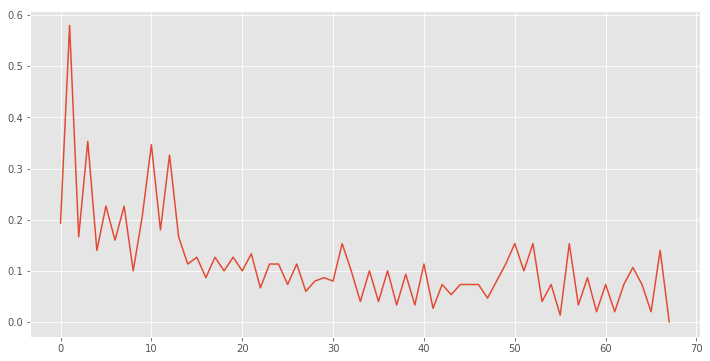

In [23]:
plt.figure(figsize=(12,6))
plt.plot(model.costs_)

## MNIST data test 

Reading in and transforming data...
MNIST train accuracy: 1.0


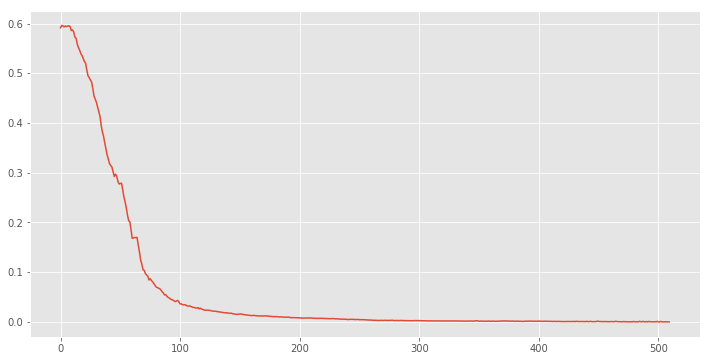

In [26]:
X,Y = get_mnist() 
idx = np.logical_or( Y==0, Y==1 ) 
X = X[idx]
Y = Y[idx]
Y[Y==0] = -1 

model= Perceptron()

model.fit(X,Y, learning_rate=1e-2)
print("MNIST train accuracy:", model.score(X,Y))
plt.figure(figsize=(12,6))
plt.plot(model.costs_)

## XOR data test  
Of course, this perceptron can solve only linear classification problem.   
XOR (or donut) is typical nonlinear example.  

XOR accuracy: 0.25


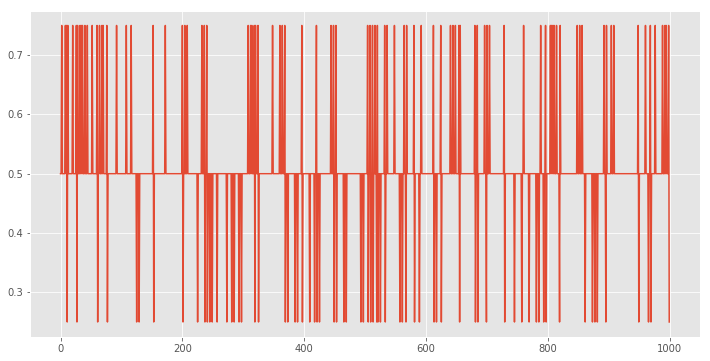

In [27]:
X,Y = get_simple_xor() 
Y[Y==0] = -1 
model.fit(X,Y) 
print("XOR accuracy:", model.score(X,Y))

plt.figure(figsize=(12,6))
plt.plot(model.costs_)